# The Drunkard's Walk

A drunken farmer is standing in the middle of a field, and every second the farmer takes one step in a random direction. 

What is her (or his) expected distance from the origin in 1000 seconds?

In [47]:
'''Creates a new class called Location''' 
'''An abstraction of the location of a drunk in the farmers field'''
'''Uses Cartesian Coordinates system (x and y) to define location in the grid.'''

class Location(object):
    def __init__(self, x, y):
        '''x and y are numbers'''
        self.x, self.y = x, y
    
    def move(self, deltaX, deltaY):
        '''deltaX and deltaY are number'''
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox, oy = other.x, other.y
        xDist, yDist = self.x - ox, self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
    
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [48]:
'''random will allow a random.choice operation'''
import random

'''Creates a new class used to instantiate a Drunk with a name.'''
class Drunk(object):
    def __init__(self, name = None):
        '''Assumes name is a str'''
        self.name = name
        
    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'
    
'''Class definining the behavior of a drunk when prompted to take a step'''
'''the values in stepChoices limits each step to length one and up/down/left/right'''
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1,0), (-1,0)]
        return random.choice(stepChoices)

class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.0),(0.0, -2.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)
    
class EWDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(1.0, 0.0), (-1.0,0.0)]
        return random.choice(stepChoices)

In [49]:
def walk(f, d, numSteps):
    '''Assumes: f a Field, d a drunk in f, and numSteps an int >= 0'''
    '''Moves d numSteps times; returns the distance between the...'''
    '''...final location and the location at the start of the walk.'''
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
    '''Assumes numSteps an int >= 0, numTrials and int > 0, dClass a subclass of Drunk'''
    '''Simulates numTrials walks of numSteps steps each.'''
    '''Returns a list of the final disances for each trial.'''
    Homer = dClass()
    origin = Location(0,0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

def drunkTest(walkLengths, numTrials, dClass):
    '''walkLengths a sequence of ints >= 0'''
    '''numTrials an int > -'''
    '''dClass a subclass of Drunk'''
    '''For each number of steps in walkLengths, runs simWalks with numTrials walks and prints results'''
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' MeanDist =', round(sum(distances)/len(distances), 4))
        print(' MaxDist =', max(distances))
        print(' MinDist =', min(distances))
        print('')

In [50]:
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)

In [51]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles
        
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

In [64]:
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of', numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

import pylab

def simAll1(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'r:', 'k-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('')
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle, label = dClass.__name__)
    pylab.title('Mean Distance from Origin (' + str(numTrials) + ' trials)')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origina')
    pylab.legend(loc = 'best')
    pylab.semilogx()
    pylab.semilogy()


Starting simulation of UsualDrunk :
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps

Starting simulation of ColdDrunk :
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps

Starting simulation of EWDrunk :
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


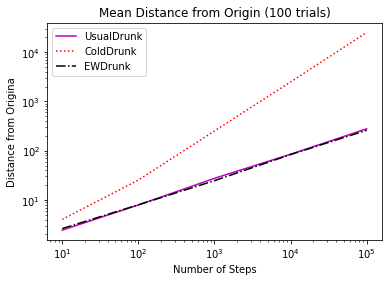

In [65]:
simAll1((UsualDrunk, ColdDrunk, EWDrunk), (10,100,1000,10000,100000), 100)